# **NASSCOM (MINI-PROJECT)**

# **ASSIGNMENT**

# **B PAVAN KUMAR**

# **20191COM0249**

# **5COM4**

# **MACHINE LEARNING**
*_Machine Learning (ML)_* : ML is an application of Artificial Intelligence (AI) that provides systems the ability to automatically learn themselves and improve from the experience without being explicitly programmed. ML focuses on the development of computer programs that can access data and use it to learn themselves.

*Supervised Learning* : The model is trained using ‘labeled data’. Datasets are said to contain labels that contain both input and output parameters. To simplify – ‘Data is already tagged with the correct answer’.

*Simple Linear Regression* : It is a Regression Model that estimates the relationship between the independent variable and the dependent variable using a straight line [y = mx + c], where both the variables should be quantitative.

*Data Set* : A collection of related sets of information that is composed of separate elements but can be manipulated as a unit by a computer.

*Data Visualisation* : It is a representation of data or information in a graph, chart, or other visual formats which is helpful to conduct analyses such as predictive analysis which can serve as helpful Visualisation to present.

*Data Cleaning* : It is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

*Models* : Those are output by algorithms and are comprised of model data and a prediction algorithm.

*Training Model* : In supervised learning, an ML Algorithm builds a model by examining many examples and attempting to find a model that minimizes loss and improves prediction accuracy.

These are the few terms used in this article and to get familiar with. Now let’s get started with the analysis and prediction of the model. In this tutorial, I am going to use supervised data and simple linear regression for analysis and prediction. The Ultimate goal is the predict the height of a person provides his age using the trained model to the highest achievable accuracy using available data. I have used the universal favorite programming language for ML i.e. Python to build and train the ML model and Google Colab Environment.

The steps involved are:

1.Importing the dataset.

2.Visualising the Data

3.Data Cleaning

4.Build the Model and Train it

5.Make Predictions on Unseen Data

#*PROBLEM STATEMENT*#

"Predict the charges to the Insurance policyholders. You can analyze all relevant data for the health insurance of a group of insurance policies and develop focused amount charge program."

**Loading the dataset**

In [2]:
#import dataset
import pandas as pd
df=pd.read_csv("/content/insurance (1).csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Data Preprocessing**

In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


**Data Cleaning**

In [6]:
from sklearn.preprocessing import LabelEncoder
k=df.apply(LabelEncoder().fit_transform)
k.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,197,0,1,3,1005
1,0,1,350,1,0,2,57
2,10,1,331,3,0,2,306
3,15,1,73,0,0,1,1097
4,14,1,223,0,0,1,254


**Data Visualization**

Using the converted dataset,we can visualize the correlation heatmap

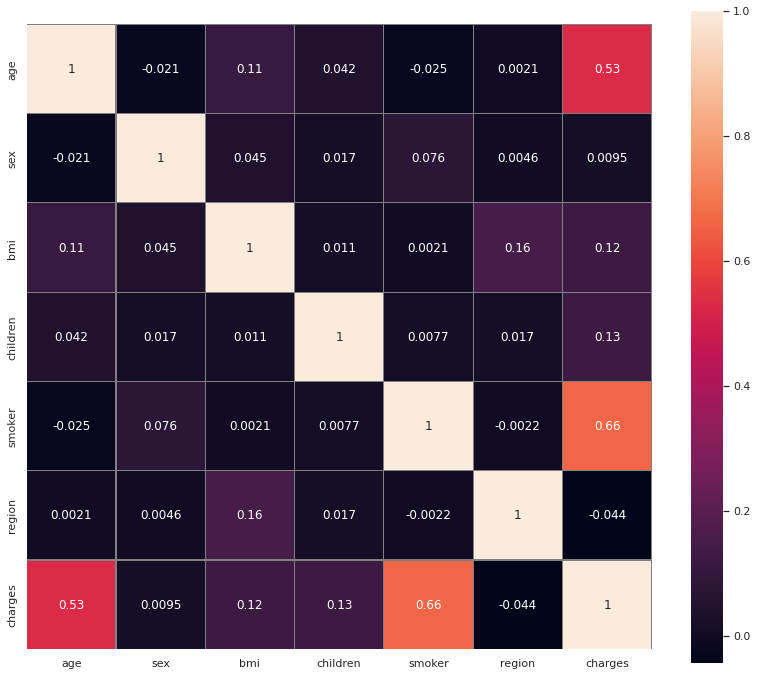

In [7]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(color_codes=True)
plt.figure(figsize=(14,12))
sn.heatmap(k.astype(float).corr(),
           linewidths=0.2,
           square=True,
           linecolor='gray',
           annot=True)
plt.show()

Seems like age and smoking weigh the most when looking at the charges row (or column). We expect the weights of these two to be higher than the rest.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


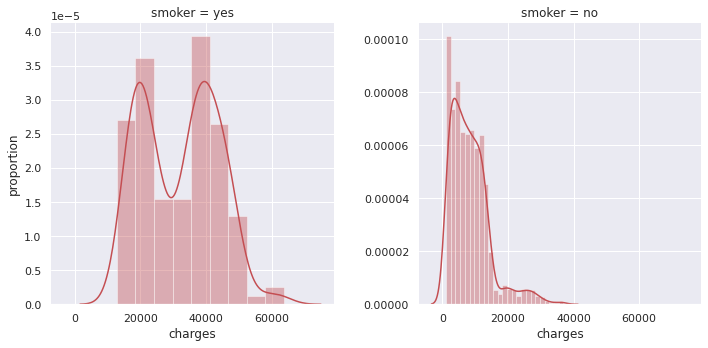

In [24]:
g=sn.FacetGrid(df,col='smoker',size=5,sharey=False,sharex=True)
g.map(sn.distplot,"charges",color='r');
g.set_axis_labels("charges","proportion")
g.despine(left=True)

Smokers pay more for health

*Distplot*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


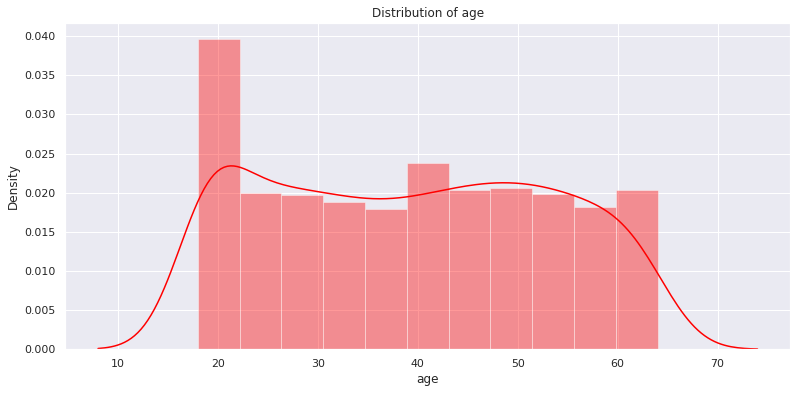

In [26]:
plt.figure(figsize=(13,6))
plt.title("Distribution of age")
sn.distplot(df["age"],color="red")          

*Catplot*

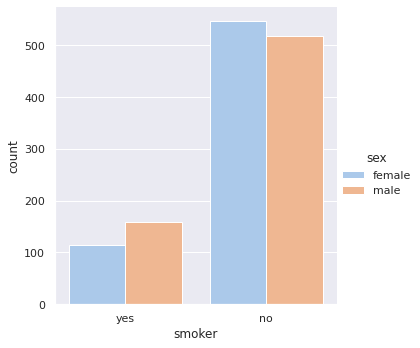

In [28]:
sn.catplot(data=df,x='smoker',kind='count',hue='sex',palette='pastel')
plt.show()

->The majority understands the downsides of smoking.
The data seems preety balanced with a slight skew towards male.

**Data Modeling**

In [30]:
from sklearn.preprocessing import OneHotEncoder
df["age"]=df["age"].astype(float)
df["children"]=df['charges'].astype(float)
df=pd.get_dummies(df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,16884.92400,16884.92400,1,0,0,1,0,0,0,1
1,18.0,33.770,1725.55230,1725.55230,0,1,1,0,0,0,1,0
2,28.0,33.000,4449.46200,4449.46200,0,1,1,0,0,0,1,0
3,33.0,22.705,21984.47061,21984.47061,0,1,1,0,0,1,0,0
4,32.0,28.880,3866.85520,3866.85520,0,1,1,0,0,1,0,0


In [32]:
x=df.drop(columns=['charges'])
y=df['charges']
print(x)
print(y)

       age     bmi  ...  region_southeast  region_southwest
0     19.0  27.900  ...                 0                 1
1     18.0  33.770  ...                 1                 0
2     28.0  33.000  ...                 1                 0
3     33.0  22.705  ...                 0                 0
4     32.0  28.880  ...                 0                 0
...    ...     ...  ...               ...               ...
1333  50.0  30.970  ...                 0                 0
1334  18.0  31.920  ...                 0                 0
1335  18.0  36.850  ...                 1                 0
1336  21.0  25.800  ...                 0                 1
1337  61.0  29.070  ...                 0                 0

[1338 rows x 11 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype

Since no testing data is provided,we will spilt the given dataset into training and testing sets.

In [55]:
#use 10% of dataset as testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=42)

*LINEAR REGRESSION*

In [61]:
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
lr=LinearRegression().fit(train_X,train_y)

lr_train_pred=lr.predict(train_X)
lr_test_pred=lr.predict(test_X)
print("Predicted Train data : {0}\n Predicted Test data : {1}".format(lr_train_pred,lr_test_pred))

lr_train_mse=mean_squared_error(lr_train_pred,train_y)
lr_test_mse=mean_squared_error(lr_test_pred,test_y)
print("MSE Train data : {:.5}\n MES Test data : {:.5}".format(lr_train_mse,lr_test_mse))

lr_train_rmse=np.sqrt(np.absolute(lr_train_mse))
lr_test_rmse=np.sqrt(np.absolute(lr_test_mse))
print("RMSE Train data : {:.5}\n RMES Test data : {:.5}".format(lr_train_rmse,lr_test_rmse))

lr_train_r2=r2_score(lr_train_pred,train_y)
lr_test_r2=r2_score(lr_test_pred,test_y)
print("R2 Train data : {:.5}\n R2 Test data : {:.5}".format(lr_train_r2,lr_test_r2))

Predicted Train data : [ 5649.715   12347.172   12404.8791  ... 11931.12525 46113.511
 10214.636  ]
 Predicted Test data : [ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918   4536.259
  2117.33885 14210.53595  3732.6251  10264.4421  18259.216    7256.7231
  3947.4131  46151.1245  48673.5588  44202.6536   9800.8882  42969.8527
  8233.0975  21774.32215  5080.096    7441.501    1256.299    2755.02095
 11085.5868  10923.9332  12644.589   18804.7524   9715.841    1131.5066
 15828.82173 11842.62375  2020.5523   5693.4305   2904.088    7448.40395
  2597.779    7337.748   23887.6627  38709.176    4687.797    2643.2685
 11674.13    12124.9924   4889.9995  12333.828    3579.8287   4391.652
 42124.5153   4463.2051  13887.204    1719.4363  28476.73499  1708.92575
 10594.2257  25333.33284  3645.0894  38746.3551  11848.141   10564.8845
 13880.949    4753.6368  27941.28758  8017.06115 23045.56616  4133.64165
 17942.106   25992.82104  3594.17085  1682.597    6079.6715   9411.005
  8283.6807 

ACCURACY OF LR

In [60]:
from sklearn.model_selection import cross_val_score
lr_cv=cross_val_score(LinearRegression(),x,y,cv=7)
#lr_mean=lr_cv.mean()
#lr_std=lr_cv.std()
#print(lr_mean)
#print(lr_std)
#accuracy +/- 2*standard deviations
print("Mean is {0} and accuracy is (+/- {1})".format(lr_cv.mean(),2*lr_cv.std()))

Mean is 1.0 and accuracy is (+/- 0.0)


**Spliting data by Polynomial Features**

In [64]:
from sklearn.preprocessing import PolynomialFeatures

X_poly =  PolynomialFeatures(degree = 2).fit_transform(x)

train_X,test_X, train_y,test_y = train_test_split(X_poly, y, test_size=0.1, random_state=42)

In [65]:
lr=LinearRegression().fit(train_X,train_y)

lr_train_pred=lr.predict(train_X)
lr_test_pred=lr.predict(test_X)
print("Predicted Train data : {0}\n Predicted Test data : {1}".format(lr_train_pred,lr_test_pred))

lr_train_mse=mean_squared_error(lr_train_pred,train_y)
lr_test_mse=mean_squared_error(lr_test_pred,test_y)
print("MSE Train data : {:.5}\n MES Test data : {:.5}".format(lr_train_mse,lr_test_mse))

lr_train_rmse=np.sqrt(np.absolute(lr_train_mse))
lr_test_rmse=np.sqrt(np.absolute(lr_test_mse))
print("RMSE Train data : {:.5}\n RMES Test data : {:.5}".format(lr_train_rmse,lr_test_rmse))

lr_train_r2=r2_score(lr_train_pred,train_y)
lr_test_r2=r2_score(lr_test_pred,test_y)
print("R2 Train data : {:.5}\n R2 Test data : {:.5}".format(lr_train_r2,lr_test_r2))

Predicted Train data : [ 5649.715   12347.172   12404.8791  ... 11931.12525 46113.511
 10214.636  ]
 Predicted Test data : [ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918   4536.259
  2117.33885 14210.53595  3732.6251  10264.4421  18259.216    7256.7231
  3947.4131  46151.1245  48673.5588  44202.6536   9800.8882  42969.8527
  8233.0975  21774.32215  5080.096    7441.501    1256.299    2755.02095
 11085.5868  10923.9332  12644.589   18804.7524   9715.841    1131.5066
 15828.82173 11842.62375  2020.5523   5693.4305   2904.088    7448.40395
  2597.779    7337.748   23887.6627  38709.176    4687.797    2643.2685
 11674.13    12124.9924   4889.9995  12333.828    3579.8287   4391.652
 42124.5153   4463.2051  13887.204    1719.4363  28476.73499  1708.92575
 10594.2257  25333.33284  3645.0894  38746.3551  11848.141   10564.8845
 13880.949    4753.6368  27941.28758  8017.06115 23045.56616  4133.64165
 17942.106   25992.82104  3594.17085  1682.597    6079.6715   9411.005
  8283.6807 

In [66]:
pr_cv = cross_val_score(LinearRegression(), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(pr_cv.mean(), pr_cv.std() * 2)) 

Accuracy: 1.0 (+/- 0.0)


Now we have a better variance score using polynomial relationships

In [ ]:
lr=LinearRegression().fit(train_X,train_y)

lr_train_pred=lr.predict(train_X)
lr_test_pred=lr.predict(test_X)
print("Predicted Train data : {0}\n Predicted Test data : {1}".format(lr_train_pred,lr_test_pred))

lr_train_mse=mean_squared_error(lr_train_pred,train_y)
lr_test_mse=mean_squared_error(lr_test_pred,test_y)
print("MSE Train data : {:.5}\n MES Test data : {:.5}".format(lr_train_mse,lr_test_mse))

lr_train_rmse=np.sqrt(np.absolute(lr_train_mse))
lr_test_rmse=np.sqrt(np.absolute(lr_test_mse))
print("RMSE Train data : {:.5}\n RMES Test data : {:.5}".format(lr_train_rmse,lr_test_rmse))

lr_train_r2=r2_score(lr_train_pred,train_y)
lr_test_r2=r2_score(lr_test_pred,test_y)
print("R2 Train data : {:.5}\n R2 Test data : {:.5}".format(lr_train_r2,lr_test_r2))

**Random Forest regression**

In [ ]:
rfr_cv = cross_val_score(RandomForestRegressor(n_estimators = 50), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(rfr_cv.mean(), rfr_cv.std() * 2)) 

**Using BayesianRidge**

In [67]:
from sklearn.linear_model import BayesianRidge

br = BayesianRidge().fit(train_X,train_y)

br_train_pred=lr.predict(train_X)
br_test_pred=lr.predict(test_X)
print("Predicted Train data : {0}\n Predicted Test data : {1}".format(br_train_pred,br_test_pred))

br_train_mse=mean_squared_error(br_train_pred,train_y)
br_test_mse=mean_squared_error(br_test_pred,test_y)
print("MSE Train data : {:.5}\n MES Test data : {:.5}".format(br_train_mse,br_test_mse))

br_train_rmse=np.sqrt(np.absolute(br_train_mse))
br_test_rmse=np.sqrt(np.absolute(br_test_mse))
print("RMSE Train data : {:.5}\n RMES Test data : {:.5}".format(br_train_rmse,br_test_rmse))

br_train_r2=r2_score(br_train_pred,train_y)
br_test_r2=r2_score(br_test_pred,test_y)
print("R2 Train data : {:.5}\n R2 Test data : {:.5}".format(br_train_r2,br_test_r2))


Predicted Train data : [ 5649.715   12347.172   12404.8791  ... 11931.12525 46113.511
 10214.636  ]
 Predicted Test data : [ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918   4536.259
  2117.33885 14210.53595  3732.6251  10264.4421  18259.216    7256.7231
  3947.4131  46151.1245  48673.5588  44202.6536   9800.8882  42969.8527
  8233.0975  21774.32215  5080.096    7441.501    1256.299    2755.02095
 11085.5868  10923.9332  12644.589   18804.7524   9715.841    1131.5066
 15828.82173 11842.62375  2020.5523   5693.4305   2904.088    7448.40395
  2597.779    7337.748   23887.6627  38709.176    4687.797    2643.2685
 11674.13    12124.9924   4889.9995  12333.828    3579.8287   4391.652
 42124.5153   4463.2051  13887.204    1719.4363  28476.73499  1708.92575
 10594.2257  25333.33284  3645.0894  38746.3551  11848.141   10564.8845
 13880.949    4753.6368  27941.28758  8017.06115 23045.56616  4133.64165
 17942.106   25992.82104  3594.17085  1682.597    6079.6715   9411.005
  8283.6807 